# Stochastic Simulation -- Asignment 1
## Walter Vianen -- 11811293

In [2]:
# Import packages
from matplotlib import pyplot as plt
from matplotlib import colors
from scipy import stats
from numba import jit
import numpy as np
import pandas as pd
import math
import itertools
import random

In [3]:
MAXITER = 300
CMAP = 'gnuplot2'
DPI = 300

In [4]:
# Functions needed to compute the Mandelbrot set (adapted from https://gist.github.com/jfpuget/60e07a82dece69b011bb)
@jit
def mandelbrot(c, maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 3:
            return n
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j], maxiter)
    return (r1, r2, n3)

def mandelbrot_image(xmin, xmax, ymin, ymax, width, height, maxiter, cmap):
    img_width = DPI * width
    img_height = DPI * height
    x,y,z = mandelbrot_set(xmin ,xmax, ymin, ymax, img_width, img_height, maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)
    ticks = np.arange(0, img_width+1, int(img_width/4))
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(0.5)
    ax.imshow(z.T, cmap=cmap, origin='lower', norm=norm)
    plt.show()

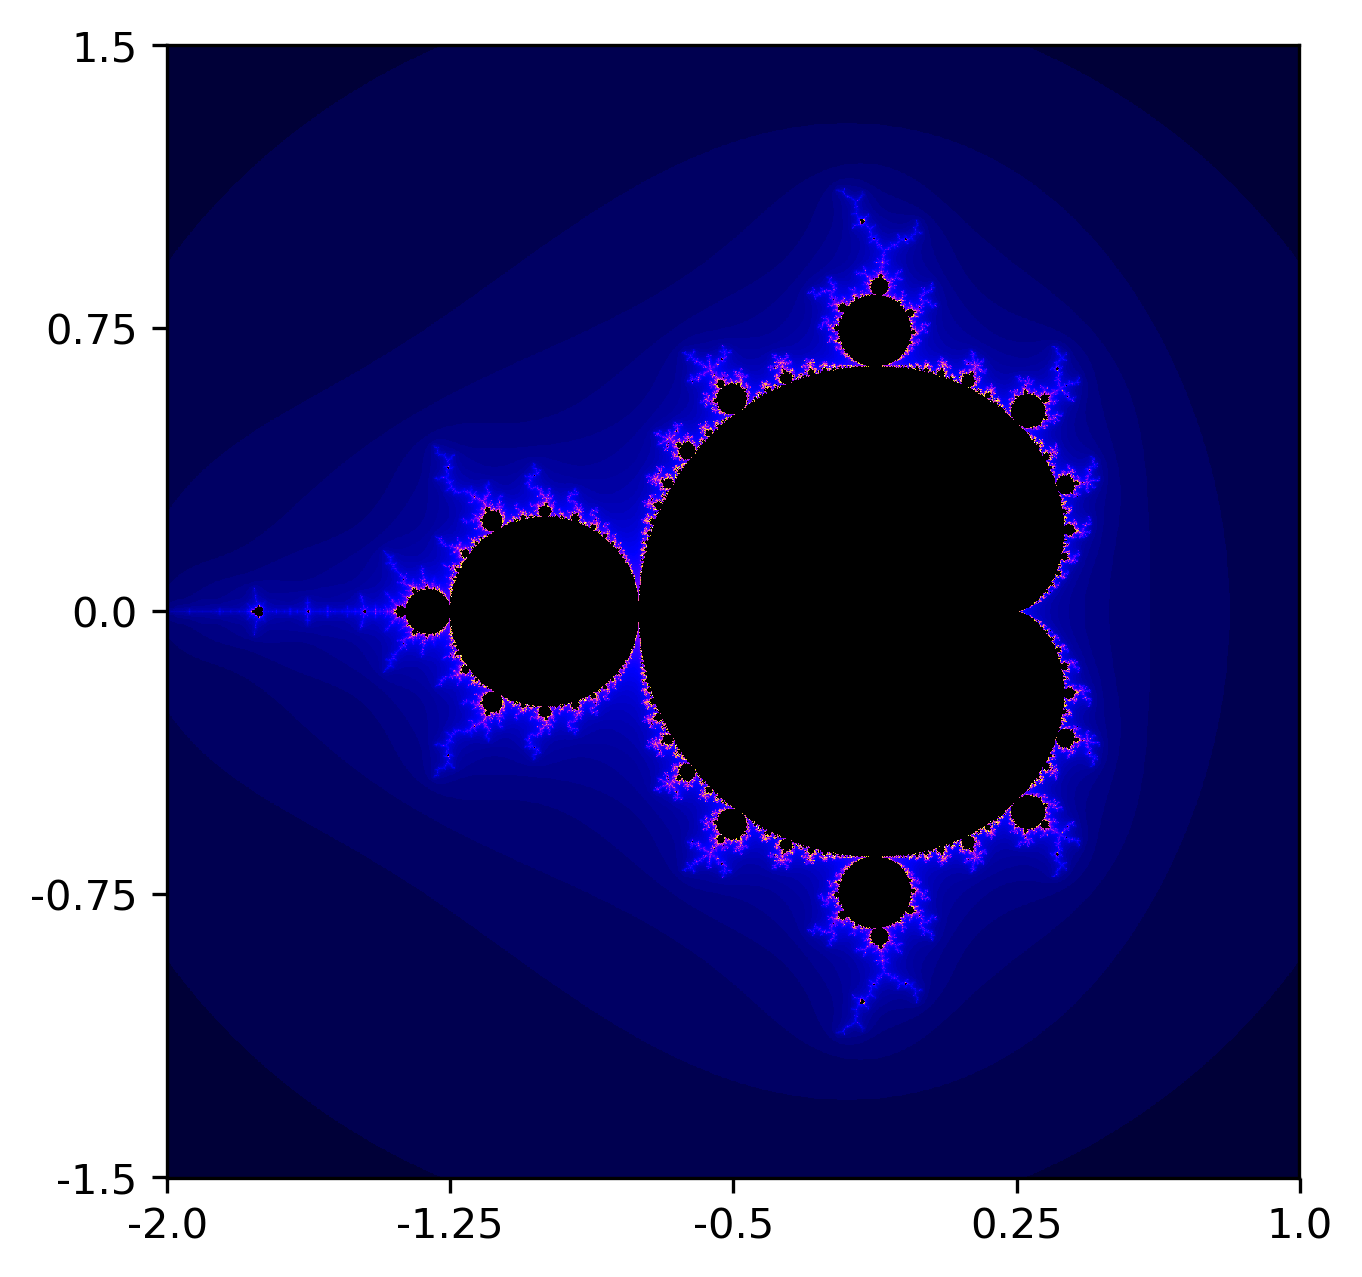

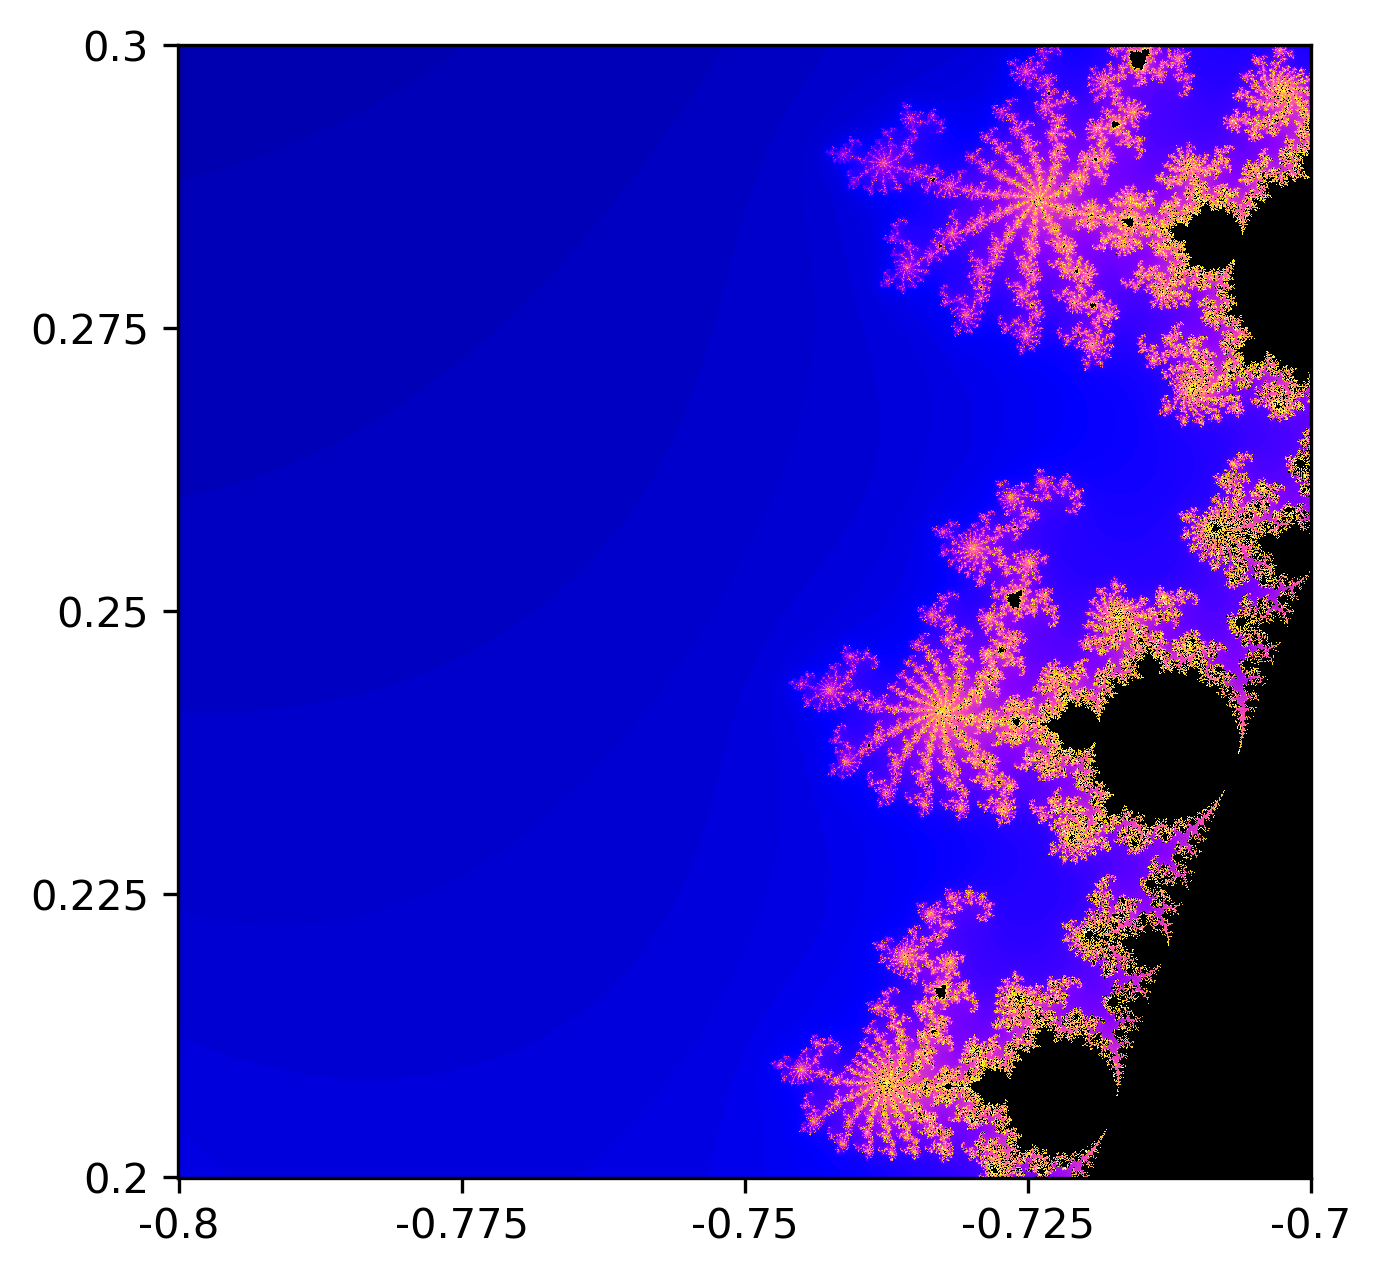

In [7]:
# Plot Mandelbrot Set (with different zoom)
mandelbrot_image(-2, 1, -1.5, 1.5, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-1.5, 0, -0.75, 0.75, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-1.0, -0.5, 0, 0.5, 5, 5, maxiter = MAXITER, cmap=CMAP)

# mandelbrot_image(-0.8, -0.7, 0.2, 0.3, 5, 5, maxiter = MAXITER, cmap=CMAP)

In [20]:
# Estimation of area of mandelbrot set using selected parameter settings
img_width = DPI * 5
img_height = DPI * 5
xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
x,y,z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, maxiter = MAXITER)
mandelbrot_pixels = np.sum(z == 0)
mandelbrot_ratio = mandelbrot_pixels / (img_width * img_height)
total_area = abs(xmin - xmax) * abs(ymin - ymax)
mandelbrot_area = mandelbrot_ratio * total_area

print(mandelbrot_pixels, mandelbrot_ratio, mandelbrot_area)

379398 0.16862133333333335 1.517592


Using the parameter settings we have previously defined the best estimation of the area of the mandelbrot set we can make using a hit and miss algorithm is the value of `mandelbrot_area`. 

In [59]:
# Basic hit and miss algorithm 
SHOTS = 100000
hits = 0
for s in range(SHOTS): 
    x_random = random.randint(0, img_width-1)
    y_random = random.randint(0, img_height-1)
    if(z[x_random, y_random] == 0): 
        hits += 1
estimated_area = (hits / SHOTS) * total_area
print(estimated_area)
error = abs(estimated_area - mandelbrot_area)
print(error)

1.5425099999999998
0.024917999999999774
